### Module 4A - Genetic Algorithms (for process optimization)

Written for AIFS.   
Copyright 2023 Tarek Zohdi, Carla Becker. All rights reserved.

In this project, you will use a genetic algorithm to find system parameters for a spark sintering process (starter code
provided) that match a desired result. You may solve these problems by hand and/or using computational tools
such as Python etc. Please include all handwritten work and code used to solve each problem.

In [3]:
############################################### Import Packages ##########################################
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import rc
from Pi_sintering_PYTHON import Pi, voight, ivoight, frob_norm

In [4]:
############################################### Definitions ##########################################
# Pi(Lambda)          anonymous function for evaluating fitness
#                          Pi.m should be in the working directory
# K,          1 x 1,  number of design strings to preserve and breed
# TOL,        1 x 1,  cost function threshold to stop evolution
# G,          1 x 1,  maximum number of generations
# S,          1 x 1,  total number of design strings per generation
# dv,         1 x 1,  number of design variables per string
# PI,         G x S,  cost of sth design in the gth generation
# Orig,       G x S,  indices of sorted strings before sorting
#                     e.g. Orig(10, 1) = 34 means that the 1st ranked 
#                          string in generation 10 was in position 34, 
#                          visualize using familyTree.m
# Lambda,     dv x S, array of most recent design strings
# g,          1 x 1,  generation counter
# PI_best,    1 x g,  minimum cost across strings and generations
# PI_avg,     1 x g,  average cost across strings and generations
# PI_par_avg, 1 x g,  average cost across strings and generations

def sort(pi):
    new_pi = np.sort(pi, axis=0)
    ind = np.argsort(pi, axis=0)
    return [new_pi, ind]

def reorder(Lambda, ind):
    temp = np.zeros((S,dv))
    for i in range(0, len(ind)):
        temp[i,:] = Lambda[int(ind[i]),:]
    Lambda = temp
    return Lambda

In [6]:
############################################### Givens ##########################################
P = 6
K = 6
TOL = 1e-6
G = 100
S = 20
dv = 2

J3min = 0
J3max = 1e7
D0min = 0.5
D0max = 0.9

### **Problem 1:** Coding Exercises ###  
Use the given python notebook template to complete the following coding exercises.

**Problem 1.1:** Provide a convergence plot showing the cost of the best design, the mean costs of all parent designs, and the mean cost of the overall population **for each generation**. A convergence plot should show the cost over many generations. A correct implementation will show the cost going down for the entire parent population and the best design. You should use **loglog()** or **semilogy()** when plotting your results since the cost will vary over several orders of magnitude. See the plotting examples script on bcourses for examples of good and bad plot scaling.

In [8]:
# For construction of random genetic strings
scale_factor = np.array([J3max - J3min, D0max - D0min]) # dv x 1
offset = np.array([J3min, D0min])                       # dv x 1

# Initialize
PI = np.ones((G, S))
Orig = np.ones((G, S))
Lambda = np.random.rand(S, dv)*scale_factor + offset

# First generation
g = 0
cost = Pi(Lambda)

[new_cost, ind] = sort(cost)     # order in terms of decreasing cost    
PI[g, :] = new_cost.reshape(1,S) # log the initial population costs NEED TO RESHAPE?????
Orig[g,:] = ind.reshape(1,S)     # log the indices before sorting
Lambda = reorder(Lambda, ind)    # order in terms of decreasing cost

# Store values for performance tracking
PI_best = 1e10*np.ones(G)
PI_avg = 1e10*np.ones(G)
PI_par_avg = 1e10*np.ones(G)
top_performers = Lambda[1:4,:]
top_costs = new_cost[1:4]

# Update performance trackers
PI_best[0] = np.min(new_cost)
PI_avg[1] = np.mean(new_cost)
MIN = np.min(new_cost)   

# All later generations
while (MIN > TOL) and (g < G):

    # Print generation for debugging
    # print('g=' + str(g)) 
        
    # Mating 
    parents = Lambda[0:P,:]
    kids = np.zeros((K, dv))
    
    for p in list(range(0,P,2)): # p = 0, 2, 4, 6,...      
        if P % 2:
            print('P is odd. Choose an even number of parents.')
            break
        phi1 = np.random.rand()
        phi2 = np.random.rand()
        kids[p,:]   = phi1 * parents[p,:] + (1 - phi1) * parents[p+1,:]
        kids[p+1,:] = phi2 * parents[p,:] + (1 - phi2) * parents[p+1,:]
        
    # Update Lambda (with parents)
    new_strings = np.random.rand(S-K-P, dv)*scale_factor + offset
    Lambda = np.vstack((parents, kids, new_strings)) # concatenate vertically
    
    # Evaluate fitness of new population
    cost = Pi(Lambda)
 
    # Evaluate fitness of parent population
    par_cost = cost[0:P]
        
    [new_cost, ind] = sort(cost)     
    PI[g, :] = new_cost.reshape(1,S)        
    Orig[g,:] = ind.reshape(1,S) 
    Lambda = reorder(Lambda, ind)    # order in terms of decreasing cost
    
    # Update performance trackers
    PI_best[g] = np.min(new_cost)
    PI_avg[g] = np.mean(new_cost)
    PI_par_avg[g] = np.mean(par_cost)
    
    if np.min(new_cost) < MIN:
        MIN = np.min(new_cost)

    g = g + 1

/mnt/c/Users/shiny/Berkeley/Educational Module/4A/Pi_sintering_PYTHON.py:164: RuntimeWarning: overflow encountered in exp
  softn = np.exp(-(thetan - theta0)/theta0)                         # thermal softening parameter, [unitless], Sx1
/mnt/c/Users/shiny/Berkeley/Educational Module/4A/Pi_sintering_PYTHON.py:214: RuntimeWarning: invalid value encountered in matmul
  S61n = np.matmul(EEn, Ee61n) # Second-Piola Kirchoff stress, [Pa], Sx6x1
/mnt/c/Users/shiny/Berkeley/Educational Module/4A/Pi_sintering_PYTHON.py:229: RuntimeWarning: invalid value encountered in multiply
  thetadotn_num = np.reshape(np.multiply(S33n, Epdotn).sum(axis=(1,2)), [S,1]) + np.multiply(ddotn, softn**P1)*W - divq0 + Jacn*Hn # Sx1


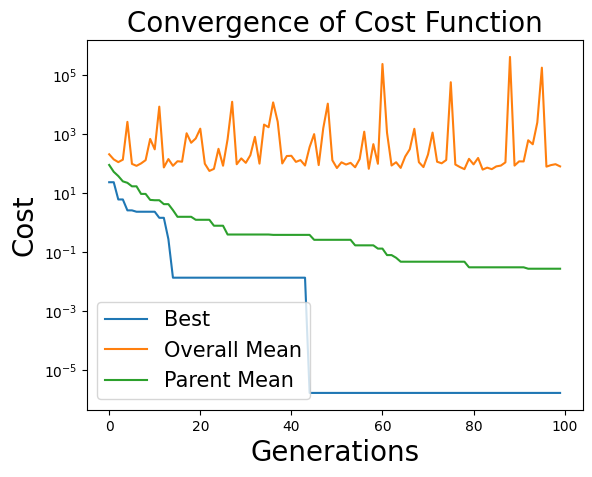

In [9]:
# Plotting
fig1, ax1 = plt.subplots()
ax1.semilogy(np.arange(0,g), PI_best[0:g])
ax1.semilogy(np.arange(0,g), PI_avg[0:g])
ax1.semilogy(np.arange(0,g), PI_par_avg[0:g])
plt.xlabel('Generations',  fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.title('Convergence of Cost Function', fontsize=20)
plt.legend(['Best', 'Overall Mean', 'Parent Mean'], fontsize=15)

**Problem 1.2:** Report your best-performing 4 designs in a table similar to the following.

In [10]:
# Save the costs and the parameters
top_costs = new_cost[0:4]
top_performers = Lambda[0:4,:]

In [13]:
print('Top Performing Strings(Design Parameters)')
print('S1')
print(top_performers[0,0])
print(top_performers[0,1])
print('S2')
print(top_performers[1,0])
print(top_performers[1,1])
print('S3')
print(top_performers[2,0])
print(top_performers[2,1])
print('S4')
print(top_performers[3,0])
print(top_performers[3,1])

Top Performing Strings(Design Parameters)
S1
8581089.913710816
0.7662995477031058
S2
9151166.644001838
0.7390757725102297
S3
9070004.324073706
0.7525822254278122
S4
8894603.92418017
0.7513278176055143


In [14]:
print('Costs of Top Performing Strings')
print('Pi1 | Pi2 | Pi3 | Pi4')
print(top_costs)

Costs of Top Performing Strings
Pi1 | Pi2 | Pi3 | Pi4
[[1.69453381e-06]
 [4.88116627e-04]
 [1.36699497e-02]
 [2.28949532e-02]]


**Problem 1.3:** Plots of the densification parameter and temperature versus time for the best-performing design. How well does the design achieve the desired system behavior?

Please see the plotting code in **sintering.ipynb** file.

The desired max temperature was = 650 K and the desired end densification was d = 0 (full densification).
We achieved this within ten-thousandths of a degree Kelvin.

### **Problem 2:** Analyzing Your Results ###  
Answer the following questions about the code you created.

**Problem 2.1:** Discuss the results. How much variation does each parameter have between your top performers?

**ANSWER:** Looking at the process parameter values in the table from part (b), we observe that there is very little variation among the top performing strings. Five significant digits had to be reported before there was a discernible difference between the values. The variation among the corresponding costs, however, is not quite as tight ? the costs range over 3 orders of magnitude! The actual sintering process may not be this sensitive. This is definitely an area for improvement in future models. It could be as simple as reducing the error tolerance value.

**Problem 2.2:** Compare results between several runs of your program. Are the results consistent, or do you get different answers?

**ANSWER:** The main difference between the two commonly produced results is whether the maximum temperature occurs at densification or at the end of the process (when the current source is turned off and the densified material stops heating).

In addition to these two reasonable results, the genetic algorithm also sometimes “get stuck” on a best string which does not meet the error tolerance because of “inbreeding” of the parents. The only way to escape such a situation is to run the genetic algorithm for a significantly greater number of generations in hopes that a randomly generated string is better than the string that is now identically all of the parents. In practice, when this happens it is best to quit the program and re-run.